In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
train_csv_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/train.csv"  
train_images_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/"  

# Load train.csv
df_train = pd.read_csv(train_csv_path)

df_train["image_path"] = df_train["file_name"].apply(lambda x: os.path.join(train_images_path, x))
df_train.head()



,Unnamed: 0,file_name,label,image_path
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...


Using device: mps


/Users/ankitsanjyal/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ankitsanjyal/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/ankitsanjyal/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [08:18<00:00, 1.11MB/s]    


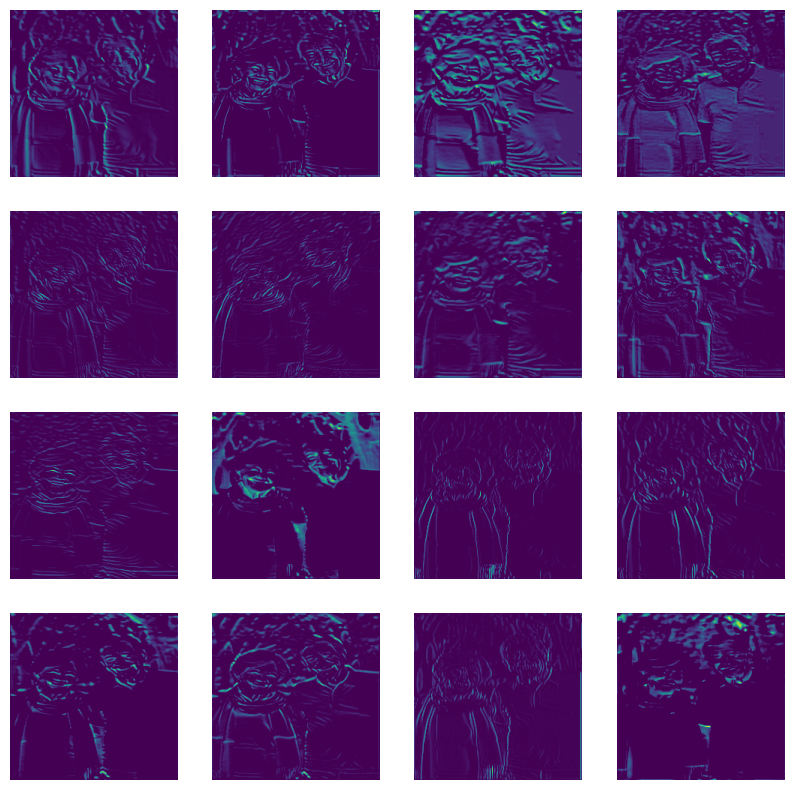

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Check if MPS GPU is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Load Pretrained VGG16 and move to MPS GPU
model = models.vgg16(pretrained=True).features.to(device).eval()

# Define Image Preprocessing Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to Load Image using OpenCV
def load_image(image_path):
    image = cv2.imread(image_path)  # Read image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_pil = Image.fromarray(image)  # Convert to PIL Image
    return transform(image_pil).unsqueeze(0).to(device)  # Add batch dimension and move to GPU

# Load First Image from Dataset
image_path = df_train["image_path"].iloc[0]  # First image
image_tensor = load_image(image_path)

# Pass Image through CNN and Extract Feature Maps
with torch.no_grad():
    feature_maps = model[:4](image_tensor)  # Extract first few layers

# Convert feature maps to CPU for visualization
feature_maps = feature_maps.cpu().squeeze(0)  # Remove batch dimension

# Plot First 16 Feature Maps
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):  # Show first 16 feature maps
    ax = axes[i // 4, i % 4]
    ax.imshow(feature_maps[i].numpy(), cmap="viridis")  # Convert tensor to NumPy
    ax.axis("off")

plt.show()
